**Проектная работа. Анализ бизнес-показателей**

**Описание проекта**

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.


Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы. 

Вам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Описание данных**

В вашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура `costs_info_short.csv`:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

In [1]:
# Загружаем библиотеки 
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# Загрузка данных из CSV-файлов
url_visits = 'https://code.s3.yandex.net/datasets/visits_info_short.csv'
visits = pd.read_csv(url_visits)  # журнал сессий
url_orders = 'https://code.s3.yandex.net/datasets/orders_info_short.csv'
orders = pd.read_csv(url_orders)  # покупки
url_costs = 'https://code.s3.yandex.net/datasets/costs_info_short.csv'
costs = pd.read_csv(url_costs)  # траты на рекламу

# Просмотр первых 5 строк каждого датафрейма
# Это поможет понять, какие данные содержатся в каждом столбце
display(visits.head())
display(orders.head())
display(costs.head())

# Проверка информации по каждому датафрейму
# Метод .info() дает информацию о типах данных, количестве записей и наличии пропусков
visits.info()
orders.info()
costs.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

In [3]:
# Преобразование столбцов с датой и временем в формат datetime
# Это необходимо для корректной работы с временными данными, такими как начало и конец сессий, даты покупок и рекламных кампаний.
visits['Session Start'] = pd.to_datetime(visits['Session Start'])  # Преобразуем время начала сессии в datetime
visits['Session End'] = pd.to_datetime(visits['Session End'])  # Преобразуем время окончания сессии в datetime
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])  # Преобразуем дату события покупки в datetime
costs['dt'] = pd.to_datetime(costs['dt']).dt.date  # Преобразуем дату рекламной кампании в datetime, оставляем только дату (без времени)

# Переименование столбцов для удобства и унификации названий
# Мы даём столбцам более понятные и единообразные имена, чтобы проще было работать с ними в дальнейшем
visits = visits.rename(columns={
    'Session Start': 'session_start', 
    'Session End': 'session_end', 
    'User Id': 'user_id',
    'Region': 'region', 
    'Device': 'device', 
    'Channel': 'channel'
})

orders = orders.rename(columns={
    'Event Dt': 'event_dt', 
    'User Id': 'user_id', 
    'Revenue': 'revenue'
})

costs = costs.rename(columns={'Channel': 'channel'})  # Переименовываем столбец 'Channel' в 'channel' для унификации

# Просмотр первых нескольких строк датафреймов после изменений
# Это позволяет убедиться, что преобразования были выполнены правильно
display(visits.head())  # Показываем первые строки датафрейма с сессиями
display(orders.head())  # Показываем первые строки датафрейма с покупками
display(costs.head())   # Показываем первые строки датафрейма с рекламными расходами

# Выводим информацию о каждом датафрейме
# Метод .info() предоставляет информацию о типах данных и количестве пропусков в каждом столбце
visits.info()  # Информация о данных сессий
orders.info()  # Информация о данных покупок
costs.info()   # Информация о данных рекламных расходов

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

In [4]:
# Проверяем количество пропущенных значений (NaN) в каждом столбце датафреймов
# Метод .isna().sum() возвращает количество пропущенных значений в каждом столбце, что помогает понять, есть ли проблемы с данными
display(visits.isna().sum())  # Показываем количество пропусков в датафрейме с сессиями
display(orders.isna().sum())  # Показываем количество пропусков в датафрейме с покупками
display(costs.isna().sum())   # Показываем количество пропусков в датафрейме с рекламными расходами

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

In [5]:
# Проверяем наличие дубликатов в каждом датафрейме
# Метод .duplicated().sum() возвращает количество строк с дубликатами, то есть строк, которые полностью идентичны другим
display(visits.duplicated().sum())  # Показываем количество дубликатов в датафрейме с сессиями
display(orders.duplicated().sum())  # Показываем количество дубликатов в датафрейме с покупками
display(costs.duplicated().sum())   # Показываем количество дубликатов в датафрейме с рекламными расходами

0

0

0

**Вывод.**

Как можно заметить, во всех 3-х таблицах данных, типы столбцов с указанием даты времени были неправильно указаны. Типы данные были изменены и проверены. Пропуски и дубликаты отсутствуют.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [6]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (sessions.sort_values(by=['user_id', 'session_start']).groupby('user_id').agg({'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index())

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [7]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [8]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [9]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

**Функции для построения графиков**

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [10]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [11]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [12]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [13]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

**3.1.** После каждого пункта сформулируйте выводы.

In [14]:
# Функция get_profiles используется для создания профилей пользователей на основе данных о визитах, заказах и рекламных расходах.
# Она будет генерировать информацию о том, когда пользователь был впервые привлечен (первый визит) и когда сделал покупку.
profiles = get_profiles(visits, orders, costs)

# Выводим первые 5 строк датафрейма профилей, чтобы проверить, как они выглядят после генерации
display(profiles.head(5))

# Определяем минимальную дату привлечения пользователей, то есть самого первого визита.
# В столбце first_ts содержится дата первого визита, поэтому находим минимальное значение.
min_date = profiles['first_ts'].min()
display(f"Минимальная дата привлечения: {min_date}")

# Определяем максимальную дату привлечения, то есть самого последнего визита.
# Для этого находим максимальное значение в столбце first_ts.
max_date = profiles['first_ts'].max()
display(f"Максимальная дата привлечения: {max_date}")

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


'Минимальная дата привлечения: 2019-05-01 00:00:41'

'Максимальная дата привлечения: 2019-10-27 23:59:04'

**Вывод.** Как наблюдается минимальная дата привлечения клиента - 1 мая 2019 года. Максимальная 27 октября 2019 года

**3.2.** Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [15]:
country_stats = profiles.groupby('region').agg(
    {'user_id': 'nunique', 'payer': 'sum'}
    ).rename(columns={'user_id': 'total_users',
                      'payer': 'total_payers'})
country_stats['region_share']=100*country_stats['total_payers']/country_stats['total_users']
country_stats=country_stats.sort_values(by='region_share', ascending=False).reset_index()
country_stats

,region,total_users,total_payers,region_share
0,United States,100002,6902,6.901862
1,Germany,14981,616,4.111875
2,UK,17575,700,3.982930
3,France,17450,663,3.799427


**Вывод.** По таблице видно, что из США, Объединенных королевств, Франции и Германии пользователи приходят в приложение. И соответственно на США приходиться больше всего пользователей которые платят. И если считать долю платящих из каждой страны, то на 1-м месте США ~ 7%, Германия - 4,1%, ОК - 4% и Франция - 3,8%

**3.3.** Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [16]:
# Группируем данные по устройствам ('device') и считаем уникальных пользователей ('user_id') и количество платящих пользователей ('payer')
device_stats = profiles.groupby('device').agg(
    {'user_id': 'nunique', 'payer': 'sum'}  # 'user_id' - количество уникальных пользователей, 'payer' - сумма платящих пользователей
).rename(columns={'user_id': 'total_users',  # Переименовываем 'user_id' в 'total_users' для понятности
                  'payer': 'total_payers'})  # Переименовываем 'payer' в 'total_payers' для понятности

# Добавляем новый столбец, который вычисляет долю платящих пользователей для каждого устройства
device_stats['device_share'] = 100 * device_stats['total_payers'] / device_stats['total_users']

# Сортируем таблицу по доле платящих пользователей в порядке убывания и сбрасываем индексы
device_stats = device_stats.sort_values(by='device_share', ascending=False).reset_index()

# Отображаем полученную таблицу
device_stats

,device,total_users,total_payers,device_share
0,Mac,30042,1912,6.364423
1,iPhone,54479,3382,6.207897
2,Android,35032,2050,5.851793
3,PC,30455,1537,5.046790


**Вывод.** Имеется 4 устройства с которого заходят в приложение. По количеству общих и платящихся пользвателей лидирует Айфоны и адроид соответственно. Но несмотря на это, самая большая доля платящихся приходиться на Мас - 6,3%, далее Айфон - 6,2%, Андроид - 5,8% и ПК - 5,04%

**3.4.** Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [17]:
# Группируем данные по каналам привлечения ('channel') и считаем уникальных пользователей ('user_id') и количество платящих пользователей ('payer')
channel_stats = profiles.groupby('channel').agg(
    {'user_id': 'nunique', 'payer': 'sum'}  # 'user_id' - количество уникальных пользователей, 'payer' - сумма платящих пользователей
).rename(columns={'user_id': 'total_users',  # Переименовываем 'user_id' в 'total_users' для понятности
                  'payer': 'total_payers'})  # Переименовываем 'payer' в 'total_payers' для понятности

# Добавляем новый столбец, который вычисляет долю платящих пользователей для каждого канала
channel_stats['channel_share'] = 100 * channel_stats['total_payers'] / channel_stats['total_users']

# Сортируем таблицу по доле платящих пользователей в порядке убывания и сбрасываем индексы
channel_stats = channel_stats.sort_values(by='channel_share', ascending=False).reset_index()

# Отображаем полученную таблицу
channel_stats

,channel,total_users,total_payers,channel_share
0,FaceBoom,29144,3557,12.204914
1,AdNonSense,3880,440,11.340206
2,lambdaMediaAds,2149,225,10.469986
3,TipTop,19561,1878,9.600736
4,RocketSuperAds,4448,352,7.913669
5,WahooNetBanner,8553,453,5.296387
6,YRabbit,4312,165,3.826531
7,MediaTornado,4364,156,3.574702
8,LeapBob,8553,262,3.063253
9,OppleCreativeMedia,8605,233,2.707728


**Вывод.** Всего есть 10 источников рекламы (не считая organic, где пользователь заходит сам). Если смотреть на количество платящихся, то в ТОП-3 стоят FaceBoom, TipTop и WahooNetBanner. Но если в приоритет ставить именно долю платящихся к общим, то картина меняется и в ТОП - 3 окажется FaceBoom - 12,2%, AdNonSense - 11,3% и lambdaMediaAds - 10,5%

**Общий вывод**
- Минимальная и максимальная дата привлечения совпадает с данными описания проекта. 
- Имеется 4 страны из которых пользователи приходят в приложение и США лидирует по количеству посещений и оплат среди пользователей (Общих -100002, оплачиваемых -6902). 
- Есть 4 устройства с которыми пользуются пользователи и Айфоны лидируют по количеству посещений и оплат среди пользователей (Общих - 54479, оплачиваемых - 3382)
- Имеется 10 рекламных истоников (organic не считаем) от которых пользователи переходя в приложению и источник FaceBoom лидируют по количеству посещений и оплат среди пользователей (Общих - 29144, оплачиваемых - 3557)

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

**4.1** Посчитайте общую сумму расходов на маркетинг.

In [18]:
# Суммируем все расходы на маркетинг из столбца 'costs' в датафрейме 'costs'
total_costs = costs['costs'].sum()  # Вычисляем общую сумму расходов

# Выводим общую сумму расходов на маркетинг
print(f"Общая сумма расходов на маркетинг: {total_costs}")

Общая сумма расходов на маркетинг: 105497.30000000002


**Вывод.** Общая сумма расходов на маркетинг составила 105497.3$

**4.2** Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [19]:
# Рассчитываем средний доход от одного пользователя (платящего или не платящего) 
revenue_per = orders['revenue'].sum() / orders['user_id'].count()  # Общая сумма дохода делим на количество пользователей

# Выводим первые строки датафрейма для предварительного просмотра данных
orders.head()  # Отображаем первые несколько строк таблицы заказов

# Выводим средний доход от одного пользователя/клиента
print(f"средний доход от 1-го пользователя/клиента: {revenue_per}")

# Выводим общую сумму дохода от всех заказов
print(orders['revenue'].sum())  # Суммируем все значения в столбце 'revenue'

средний доход от 1-го пользователя/клиента: 5.370607778772506
215962.88


In [20]:
# Группируем данные по каналам ('channel') и считаем сумму расходов на каждый канал
total_costs_channe = costs.groupby('channel')['costs'].sum().reset_index()  # Суммируем расходы по каждому каналу

# Сортируем данные по расходам в порядке убывания
total_costs_channe = total_costs_channe.sort_values(by='costs', ascending=False)  # Сортируем по столбцу 'costs'

# Добавляем новый столбец, который показывает долю расходов на каждый канал в процентах от общей суммы расходов
total_costs_channe['share_%'] = round(100 * total_costs_channe['costs'] / total_costs_channe['costs'].sum(), 2)  # Рассчитываем процент

# Отображаем результат в виде таблицы
display(total_costs_channe)  # Выводим таблицу с результатами

,channel,costs,share_%
6,TipTop,54751.30,51.90
1,FaceBoom,32445.60,30.75
7,WahooNetBanner,5151.00,4.88
0,AdNonSense,3911.25,3.71
4,OppleCreativeMedia,2151.25,2.04
5,RocketSuperAds,1833.00,1.74
2,LeapBob,1797.60,1.70
9,lambdaMediaAds,1557.60,1.48
3,MediaTornado,954.48,0.90
8,YRabbit,944.22,0.90


**Вывод.** Всего имеется 10 источников. Из низ в ТОП-3 источники по расходам TipTop - 54751.3 $, FaceBoom - 32445.6 $ и WahooNetBanner - 5151 $

**4.3** Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.

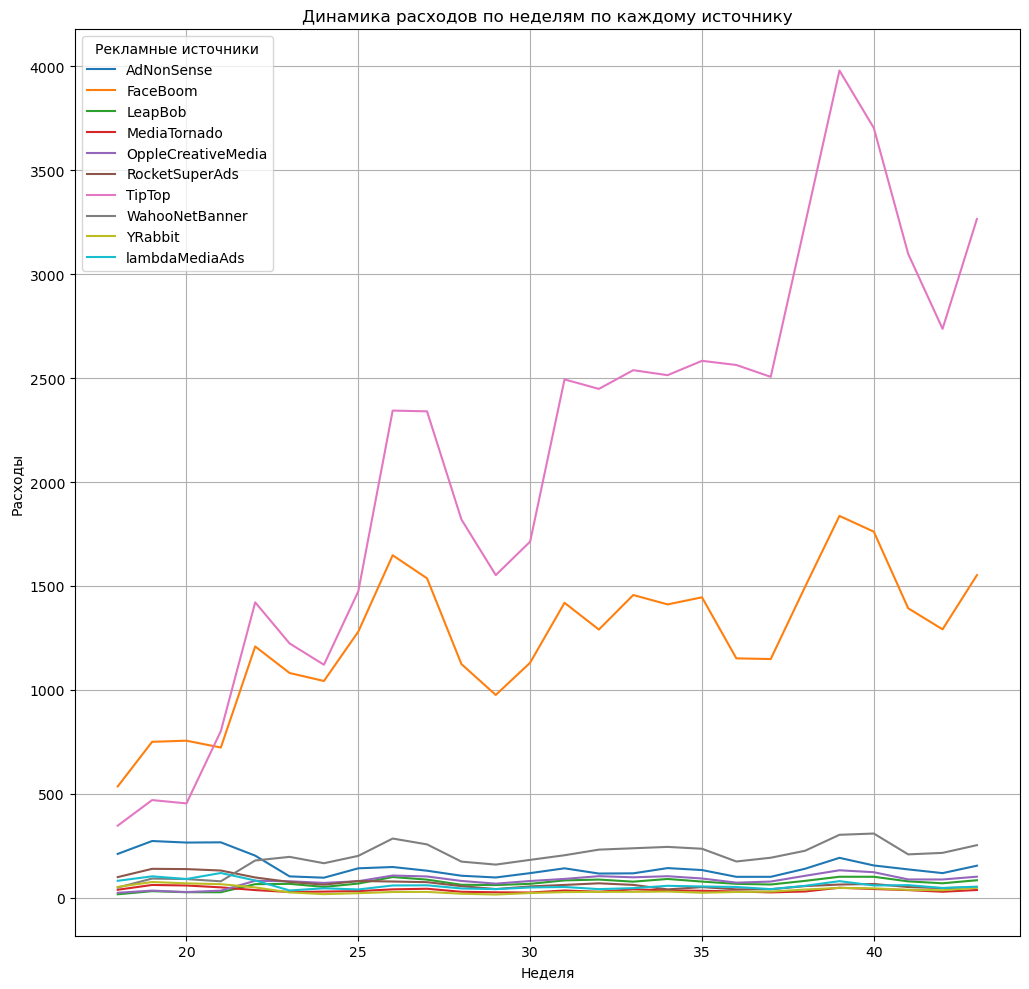

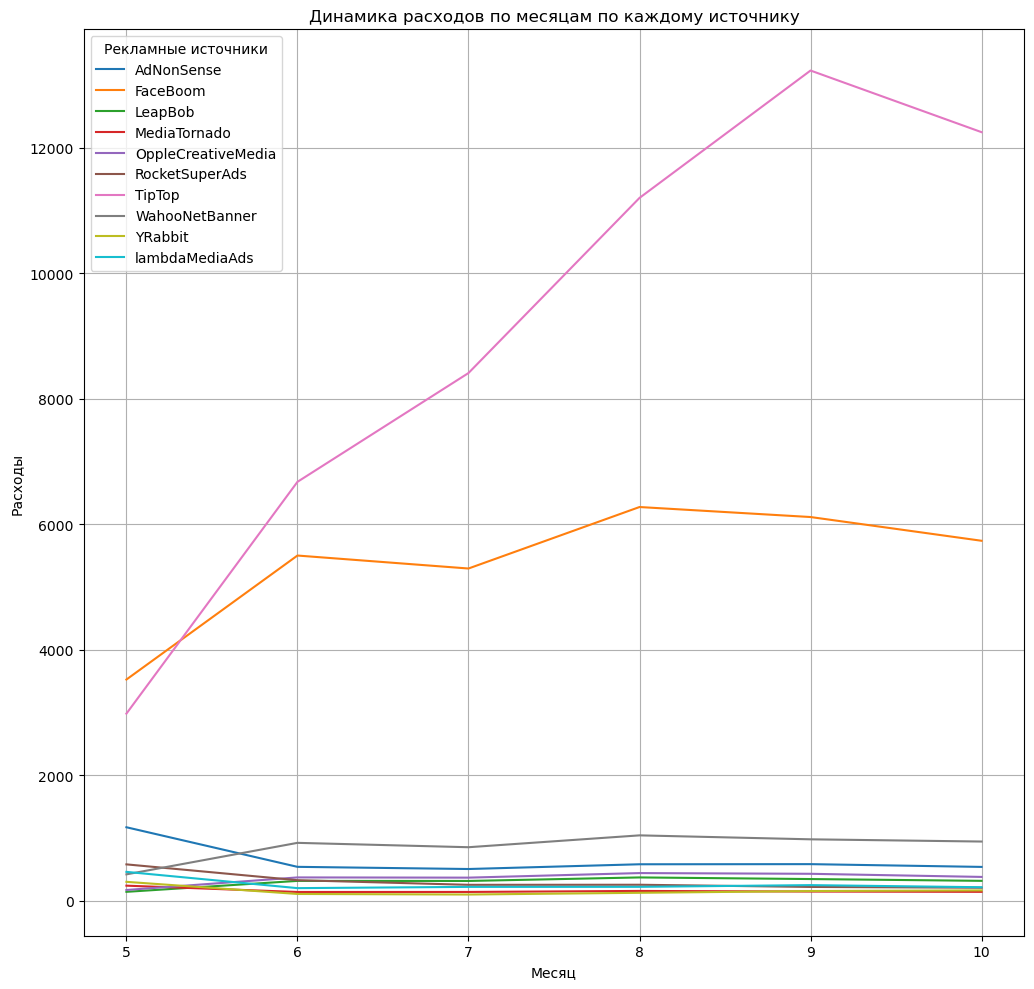

In [21]:
# Преобразуем столбец 'dt' в формат даты и извлекаем номер недели для каждого заказа
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week  # Получаем номер недели из даты

# Строим сводную таблицу для расходов по неделям и рекламным источникам
week_costs_channel = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')  # Суммируем расходы по неделям для каждого канала

# Преобразуем столбец 'dt' в формат даты и извлекаем месяц для каждого заказа
costs['month'] = pd.to_datetime(costs['dt']).dt.month  # Получаем номер месяца из даты

# Строим сводную таблицу для расходов по месяцам и рекламным источникам
month_costs_channel = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')  # Суммируем расходы по месяцам для каждого канала

# Визуализируем динамику расходов по неделям по каждому источнику на первом графике
week_costs_channel.plot(grid=True, figsize=(20, 10), ax=plt.subplot(1, 2, 1))  # Создаем график с сеткой
plt.xlabel('Неделя')  # Подпись оси X
plt.ylabel('Расходы')  # Подпись оси Y
plt.title('Динамика расходов по неделям по каждому источнику')  # Заголовок графика
plt.legend(title='Рекламные источники')  # Легенда
plt.tight_layout()  # Автоматическая настройка макета
plt.show()  # Отображение первого графика

# Визуализируем динамику расходов по месяцам по каждому источнику на втором графике
month_costs_channel.plot(grid=True, figsize=(20, 10), ax=plt.subplot(1, 2, 2))  # Создаем второй график с сеткой
plt.xlabel('Месяц')  # Подпись оси X
plt.ylabel('Расходы')  # Подпись оси Y
plt.title('Динамика расходов по месяцам по каждому источнику')  # Заголовок графика
plt.legend(title='Рекламные источники')  # Легенда
plt.tight_layout()  # Автоматическая настройка макета
plt.show()  # Отображение второго графика

**Вывод.** как было сказано, всего 10 источников. 2 источника 'TipTop', 'FaceBoom' расходы сильно превыщают, в результате другие источники сливаются. Поэтому, было принято их разделить. 'TipTop' показывает хорошие показатели. FaceBoom до 26 недели/ 6 месяца показывает хорошие показатели, далее стабилизиуется. AdNonSense сначала повышаются и далее резко снижаются. Расходы на WahooNetBanner резко повышаются и далее стабилизируется. Расходы на оставшиеся, относительно одинаковые и колеблятся от 100 до 500

**4.4** Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [22]:
# Строим сводную таблицу, чтобы посчитать количество уникальных пользователей ('user_id') и сумму расходов на привлечение пользователей ('acquisition_cost') для каждого канала
cac_data = profiles.pivot_table(index='channel',  # Группируем по каналу
                                values=['user_id',  # Считаем количество пользователей
                                        'acquisition_cost'],  # Суммируем расходы на привлечение
                                aggfunc={'user_id': 'nunique',  # 'nunique' — количество уникальных пользователей
                                         'acquisition_cost': 'sum'})  # 'sum' — сумма расходов на привлечение

# Рассчитываем среднюю стоимость привлечения одного пользователя (CAC) для каждого канала
cac_data['cac_cost'] = cac_data['acquisition_cost'] / cac_data['user_id']  # Деля расходы на количество пользователей

# Сортируем таблицу по стоимости привлечения в порядке убывания
cac_data = cac_data.sort_values(by='cac_cost', ascending=False).reset_index()  # Сортируем по столбцу 'cac_cost'

# Отображаем результат
cac_data  # Показываем таблицу с результатами

,channel,acquisition_cost,user_id,cac_cost
0,TipTop,54751.30,19561,2.799003
1,FaceBoom,32445.60,29144,1.113286
2,AdNonSense,3911.25,3880,1.008054
3,lambdaMediaAds,1557.60,2149,0.724802
4,WahooNetBanner,5151.00,8553,0.602245
5,RocketSuperAds,1833.00,4448,0.412095
6,OppleCreativeMedia,2151.25,8605,0.250000
7,YRabbit,944.22,4312,0.218975
8,MediaTornado,954.48,4364,0.218717
9,LeapBob,1797.60,8553,0.210172


**Вывод.** самое дорогое привлечение 1-го клиента обошлось от 0.2 до 2.8. Самое дорогое привлечение наблюдалось по источнику TipTop - 2.8, далее дешевле чем в 2 раза FaceBoom - 1.1 и AdNonSense - 1.0. Самое дешевое оказылись YRabbit - 0.219, MediaTornado - 0,218 и LeapBob - 0,21. Источник organic не рассматриваем, так как эти клиенты сами заходили без каких либо реклам.

**Общий вывод**
- Общая сумма расходов на маркетинг: 105497.3
- Cредний доход от 1-го пользователя/клиента: 5.37
- Наблюдается 2 источника реклам которые берут на себя большинство трат. Это TipTop стоимость - 54751.30 у.е. (51.9% от общего)
и FaceBoom - 32445.60 у.е. (30.7% от общего)
- Как видно из графика, по "Динамике расходов" сильно отличаются 2 источника TipTop и FaceBoom. И с течением времени расходы только увеличиваются. 
- Привлечение 1-го пользователся по источникам лидирует TipTop и FaceBoom, 2,8 у.е. и 1,1 у.е. соответственно. Самое дешевое оказалось MediaTornado и LeapBob, 0,22 у.е. и 0,21 у.е. соответственно. 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

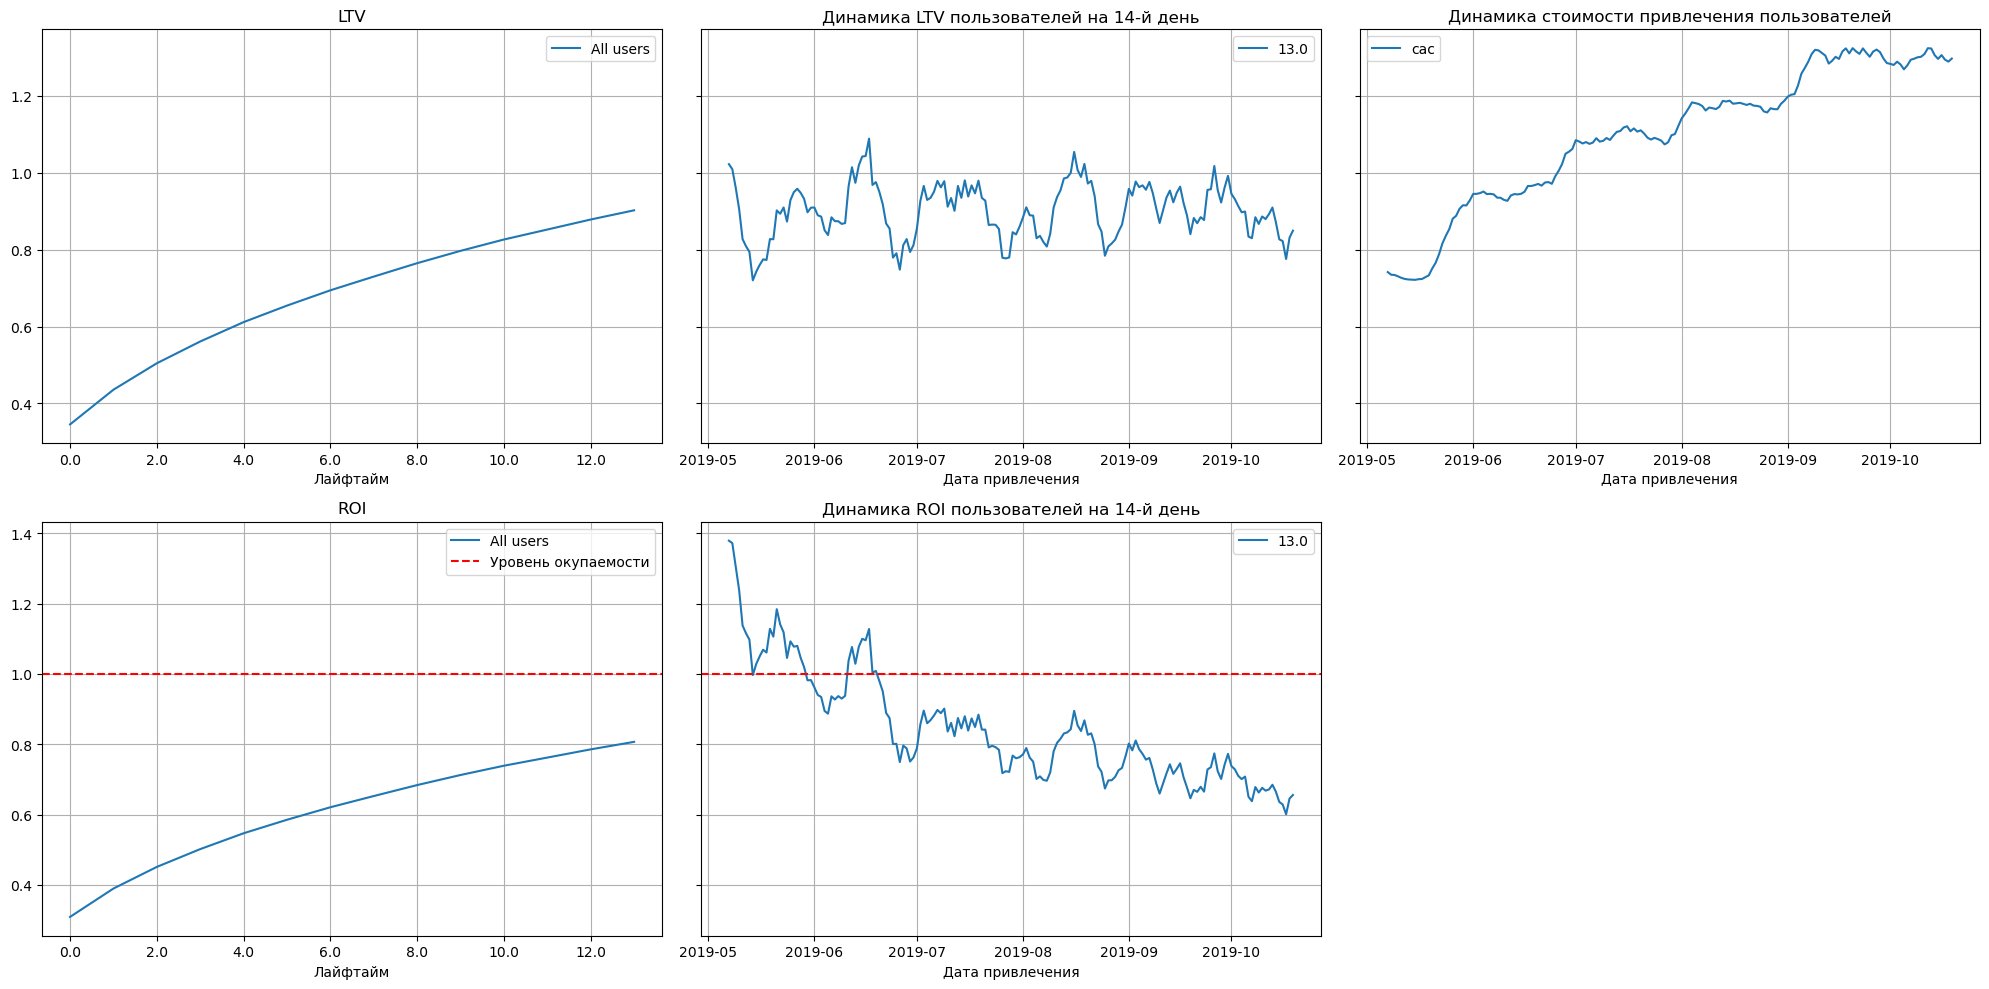

In [23]:
# Убираем органических пользователей из анализа (оставляем только платящих)
profiles = profiles[profiles['channel'] != 'organic']  # Исключаем пользователей, пришедших органически

# Определяем дату, на которую проводится анализ (1 ноября 2019 года)
observation_date = datetime(2019, 11, 1).date()  # Момент, с которого проводим анализ

# Устанавливаем горизонт анализа — 14 дней (то есть анализируем окупаемость через 2 недели)
horizon_days = 14  # Период окупаемости — 14 дней

# Вызываем функцию для вычисления LTV (Lifetime Value) и ROI (Return on Investment)
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days  # Передаем профиль и данные по заказам для вычислений
)

# Строим графики LTV и ROI, а также динамику этих показателей
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)  # Визуализируем графики LTV и ROI для анализа

**Вывод** По графикам можно сделать такие выводы:

- Реклама не окупается. ROI в конце 14 дня —  около 80%.
- CAC постепенно растет каждым месяцом. Дело в увеличении рекламного бюджета.
- На LTV показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
- Динамика показателей ROI постепенно понижается.

**5.2** 
Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания. 

Ответьте на такие вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?

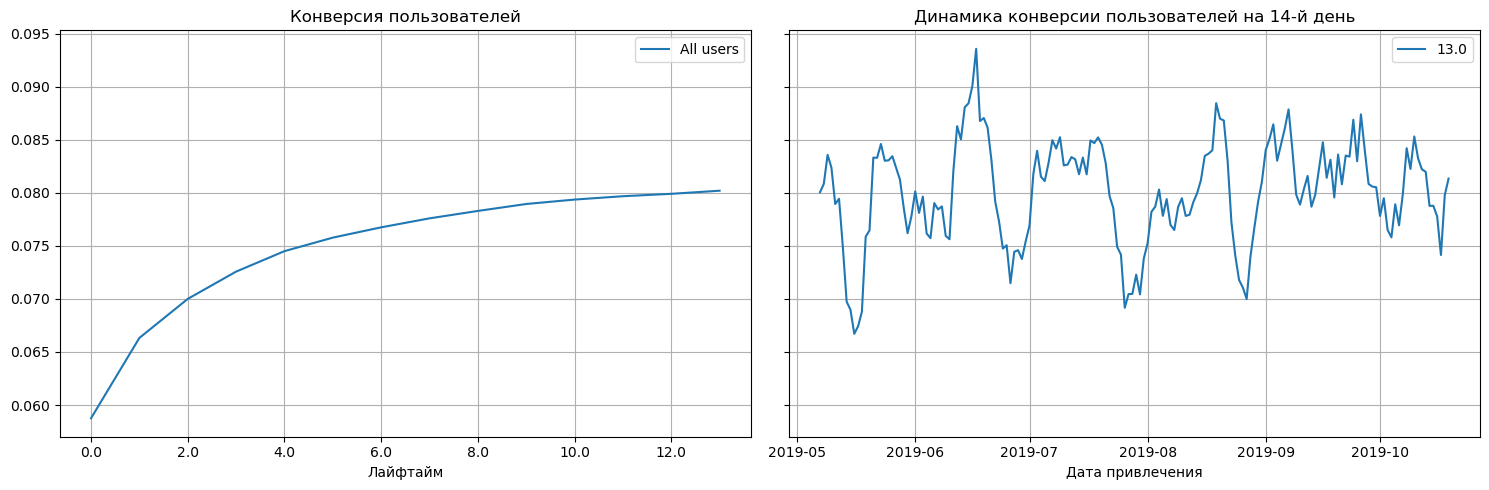

In [24]:
# Определяем список переменных (dimensions) для анализа
dimensions = []  # Можете добавить сюда категории для разбивки, например, 'device', 'country', 'channel' и т.д.

# Вычисляем конверсию и динамику ее изменения с использованием функции get_conversion
# 'conversion_raw' - необработанные данные о конверсии, 'conversion_grouped' - агрегированные данные по группам,
# 'conversion_history' - динамика конверсии во времени
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions  # Передаем данные о пользователях, заказах, дате анализа и горизонте
)

# Строим графики для анализа конверсии
plot_conversion(conversion_grouped, conversion_history, horizon_days)  # Визуализируем конверсию по группам и динамику во времени

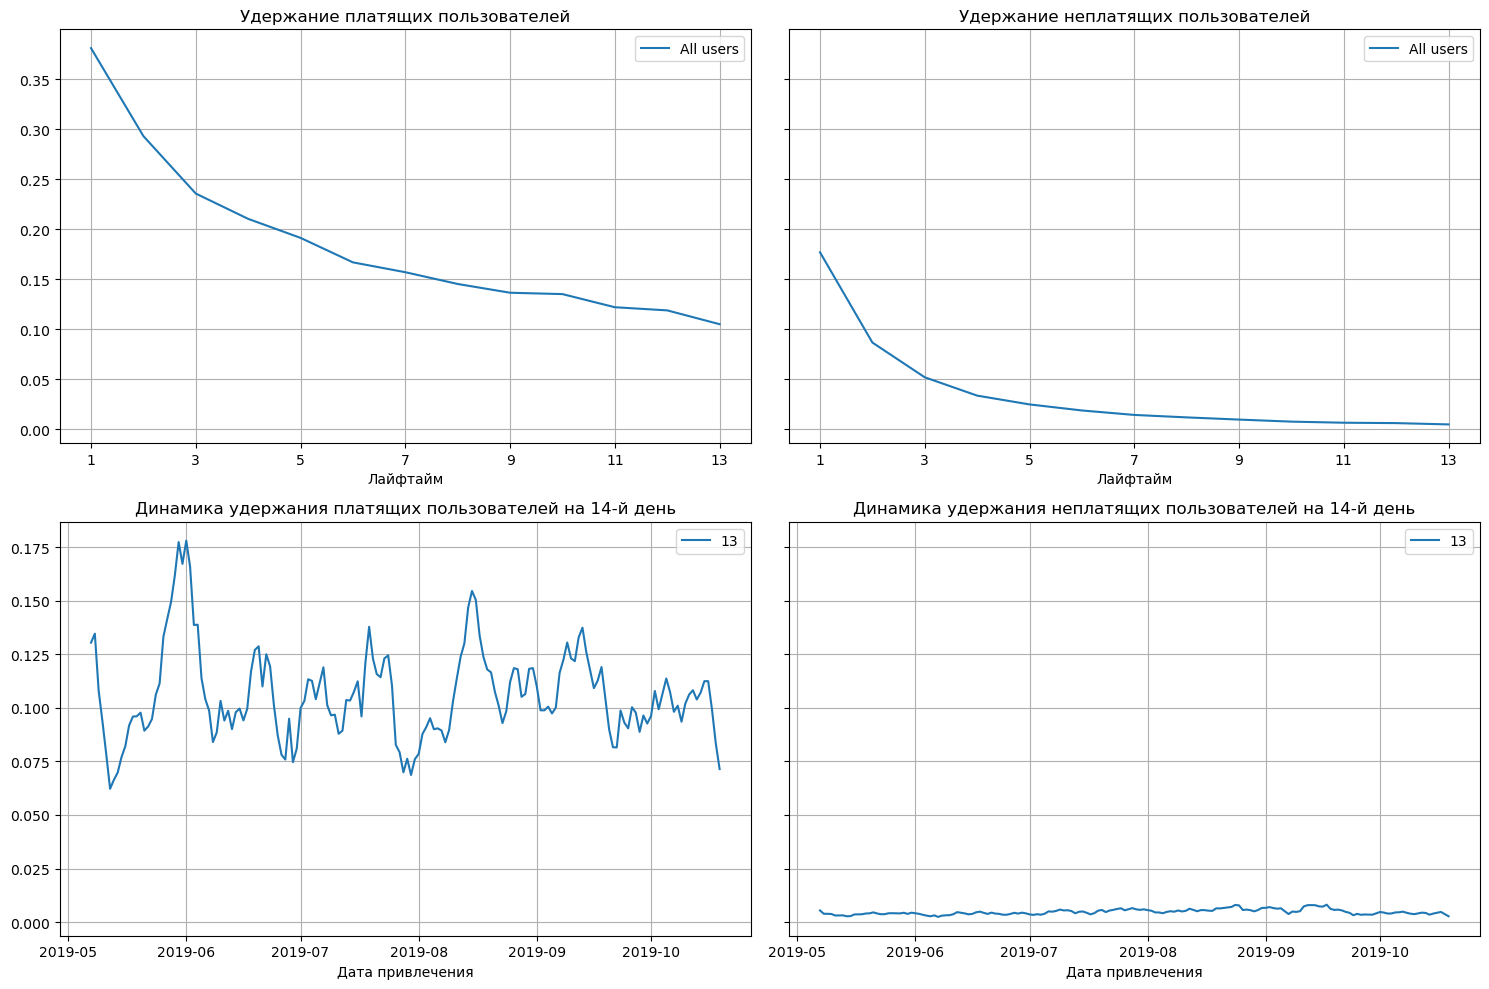

In [25]:
# Анализируем удержание пользователей
# Функция get_retention рассчитывает удержание пользователей за определенный период времени.
# Параметры:
# - profiles: данные о пользователях
# - visits: данные о визитах
# - observation_date: дата, с которой начинается анализ
# - horizon_days: количество дней для анализа (горизонт анализа)
# - dimensions: параметры для разбивки (например, 'device', 'country', 'channel')
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions  # Разбиваем данные по указанным категориям
)

# Строим графики удержания пользователей
# Функция plot_retention визуализирует динамику удержания пользователей по заданным группам и в разрезе времени.
# Параметры:
# - retention_grouped: данные удержания, сгруппированные по категориям
# - retention_history: динамика удержания пользователей во времени
# - horizon_days: горизонт анализа (например, сколько дней назад нужно посмотреть)
plot_retention(retention_grouped, retention_history, horizon_days)  # Визуализируем удержание пользователей

**Вывод** 
Действительно Общая конверсия выглядит неплохо и  постепенно растет. Но удержание платящихся, как и неплатящихся пользователей оставляет желать лучшего. За весь период, по абсолюной величине, показатели упали с 40% до 12%. Набюдается влияние сезонного фактора динамику конверсий и удержиний. 

**5.3** Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI. 

Ответьте на такие вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?

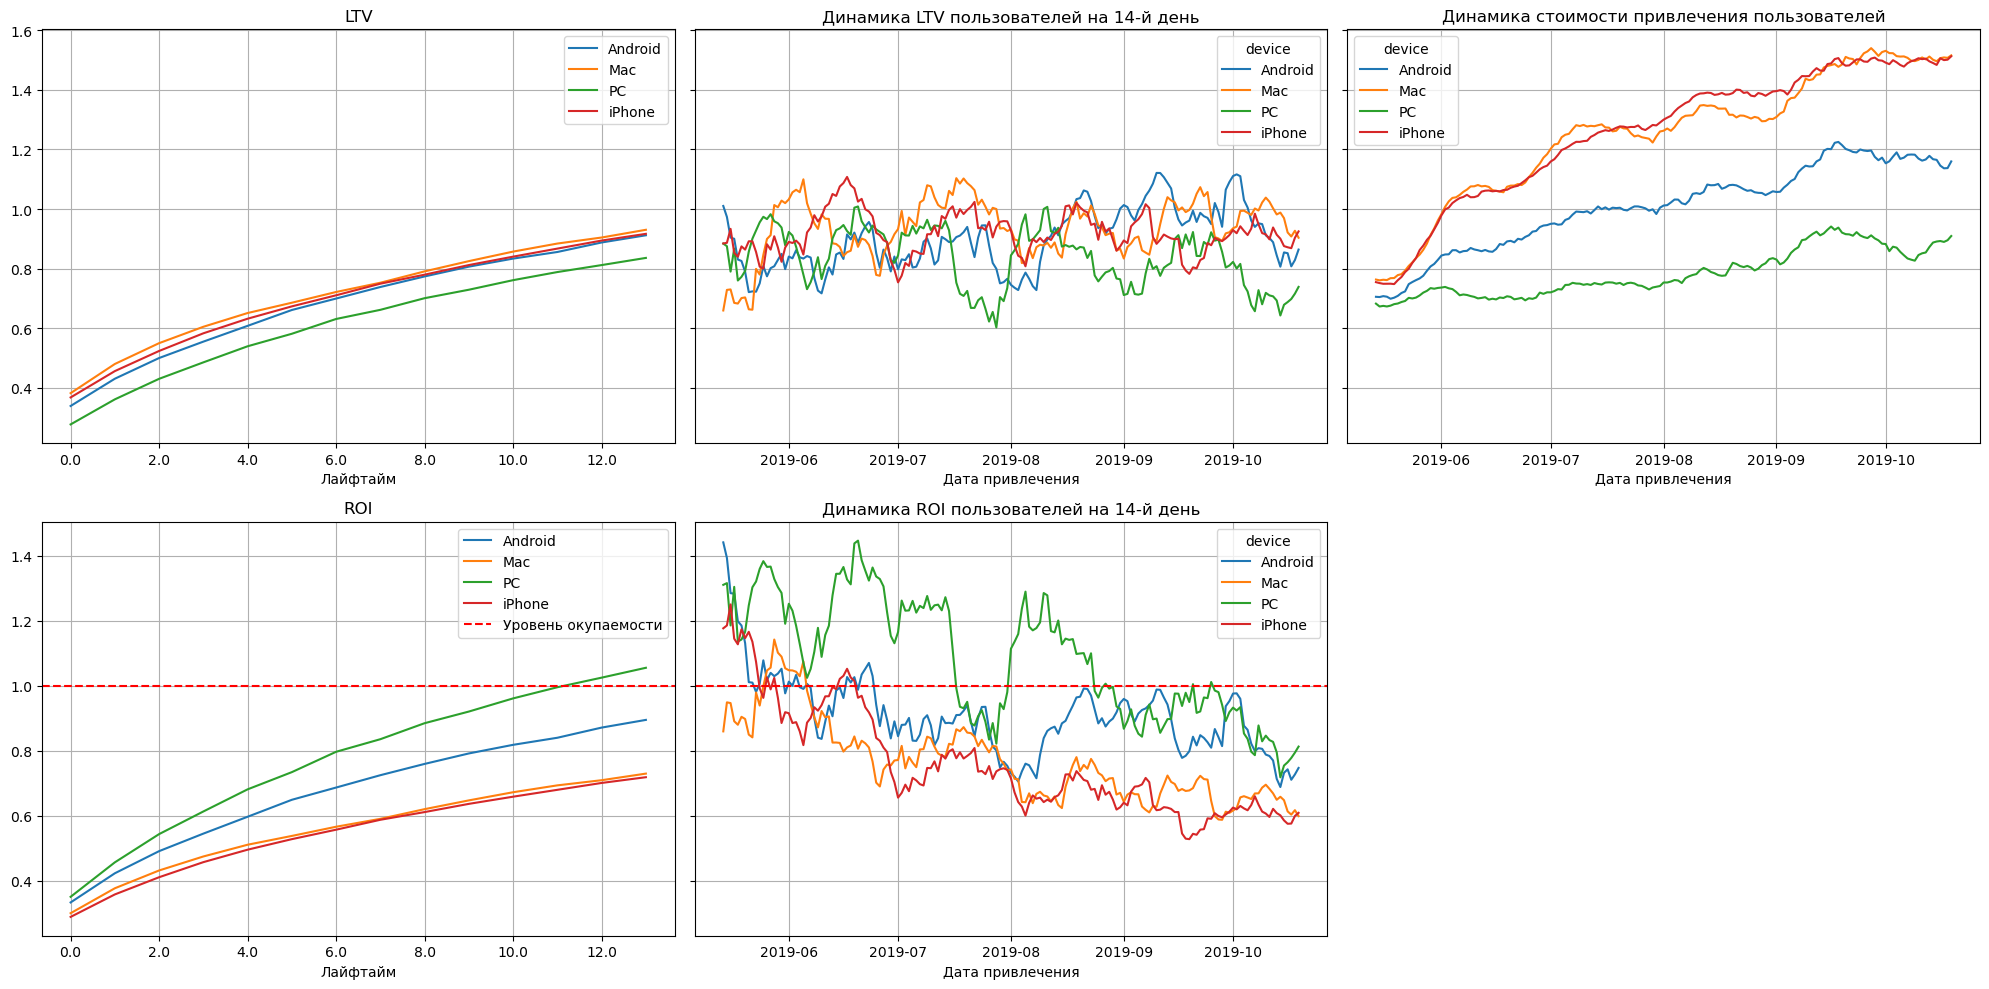

In [26]:
# Анализ окупаемости рекламы с разбивкой по устройствам
# Параметр dimensions=['device'] позволяет анализировать данные по устройствам, разделяя пользователей по типу устройства.

# Расчет LTV и ROI для каждого устройства
# Функция get_ltv рассчитывает LTV и ROI для различных устройств на основе данных профилей пользователей и заказов.
dimensions = ['device'] # Разбивка по устройствам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики LTV и ROI, а также их динамику для каждого устройства
# Функция plot_ltv_roi строит графики LTV и ROI, а также их динамику с окном анализа в 14 дней.
# В этом шаге будут построены визуализации для каждого устройства, показывающие LTV и ROI в разрезе времени.
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14 # Окно анализа 14 дней
)

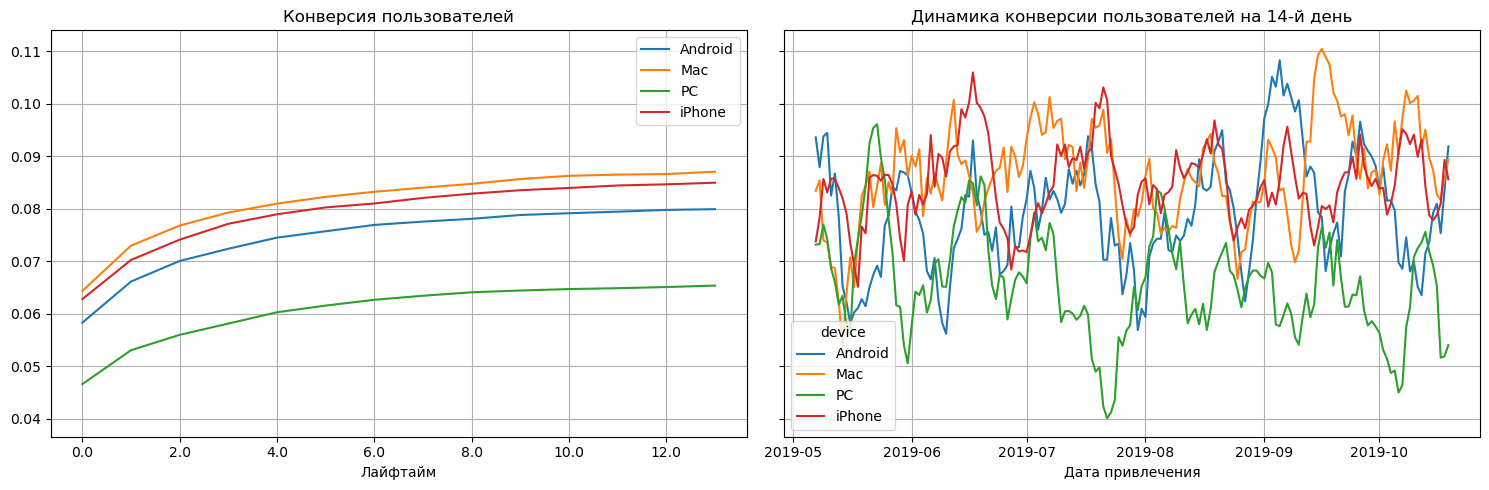

In [27]:
# Указываем, что анализ будет проводиться с разбивкой по устройствам
dimensions = ['device']

# Рассчитываем конверсию пользователей по устройствам
# Функция get_conversion рассчитывает конверсию, группируя данные по указанным параметрам (в данном случае, по устройствам).
# Параметры: 
# - profiles: данные о пользователях
# - orders: данные о заказах
# - observation_date: дата начала анализа
# - horizon_days: горизонт анализа (количество дней)
# - dimensions: параметр для группировки данных (по устройствам)
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions  # Разбивка по устройствам
)

# Строим графики конверсии по устройствам
# Функция plot_conversion визуализирует динамику конверсии по указанным группам и во времени.
# Параметры:
# - conversion_grouped: данные по конверсии, сгруппированные по устройствам
# - conversion_history: динамика конверсии по дням
# - horizon_days: горизонт анализа (например, 30 дней)
plot_conversion(conversion_grouped, conversion_history, horizon_days)  # Построение графиков конверсии

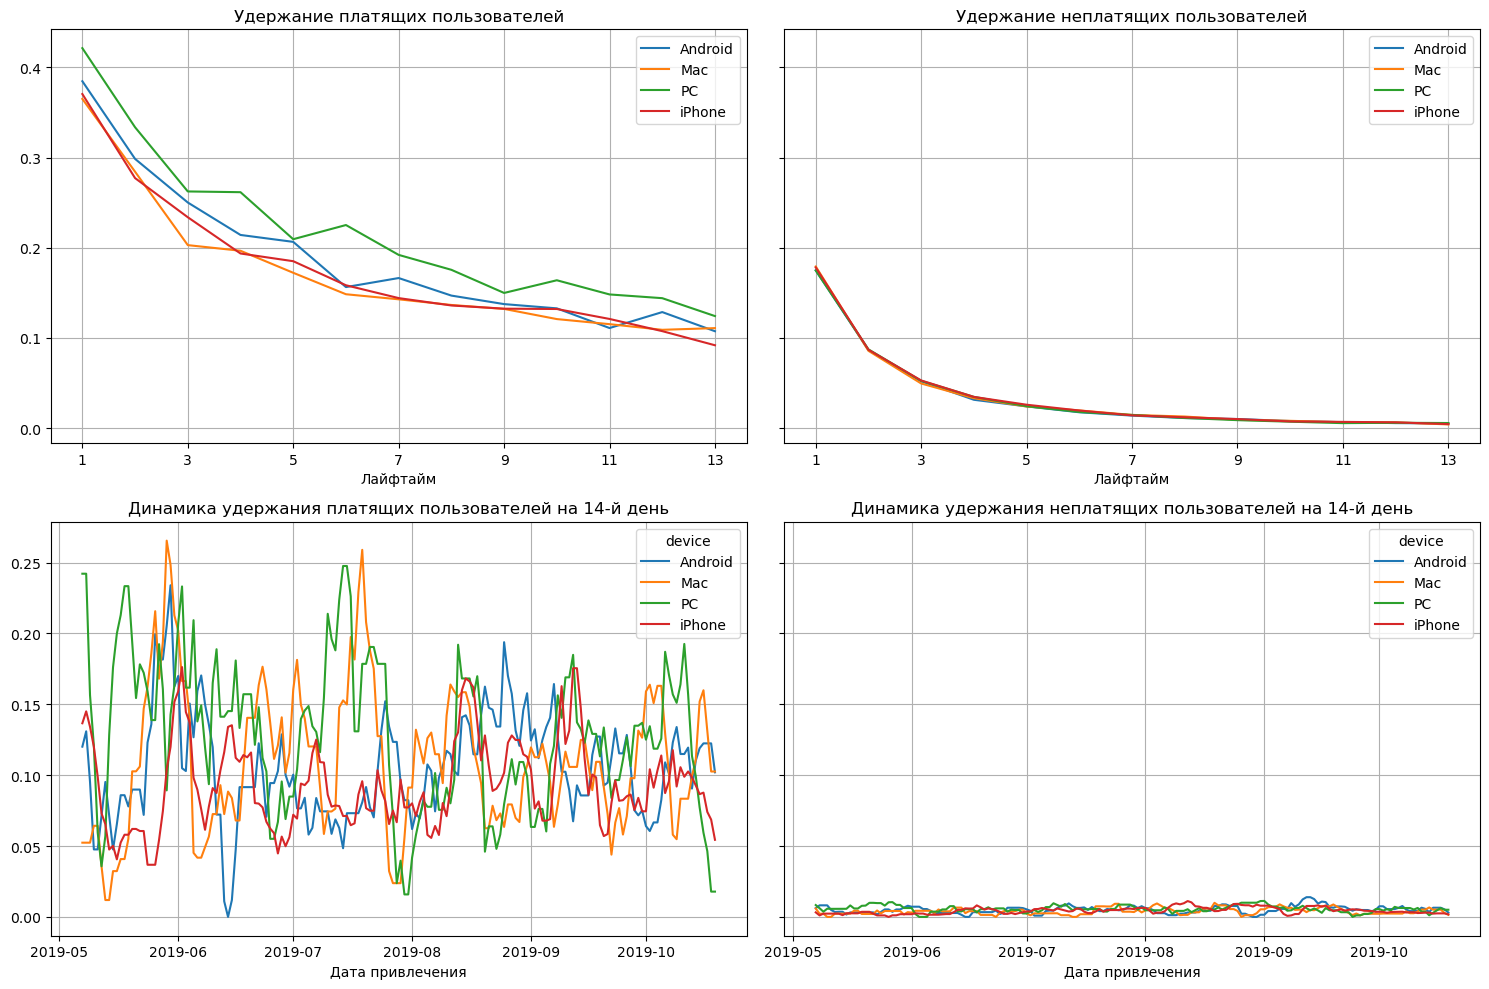

In [28]:
# Рассчитываем удержание пользователей по устройствам
# Функция get_retention рассчитывает удержание пользователей по заданным параметрам.
# Параметры:
# - profiles: данные о пользователях
# - visits: данные о визитах пользователей
# - observation_date: дата начала анализа
# - horizon_days: горизонт анализа (количество дней)
# - dimensions: параметр для группировки данных (по устройствам)
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions  # Разбивка по устройствам
)

# Строим графики удержания пользователей по устройствам
# Функция plot_retention визуализирует динамику удержания пользователей по устройствам.
# Параметры:
# - retention_grouped: данные по удержанию, сгруппированные по устройствам
# - retention_history: динамика удержания по дням
# - horizon_days: горизонт анализа (например, 30 дней)
plot_retention(retention_grouped, retention_history, horizon_days)  # Построение графиков удержания пользователей

**Вывод** Общая картина разбивки по устройствам довольно печально. 
- Реклама окупается только по ПК. Остальные устройства Андроид, Айфон и Mаc не окупаются. 
- Конверсия примерно одинаковая, кроме ПК, у ПК ниже чем у остальных, но и удержание немного лучше чем у других.
- Стоимость привлечения пользователей отличается. Только вот САС в устройствах Айфон и Мак в 2,5 раза больше чем у ПК и Андроид. При этом самое дешевое привлечение клиентов у ПК. 
- Таким образом, именно расходы устройств Андроид, Айфон и Мак на привелчение клиентом ухудшает общую картину. Но эту теорию нужно проверить. Пока можно сказать, что только ПК окупается! 

**5.4** Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI. 

Ответьте на такие вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?

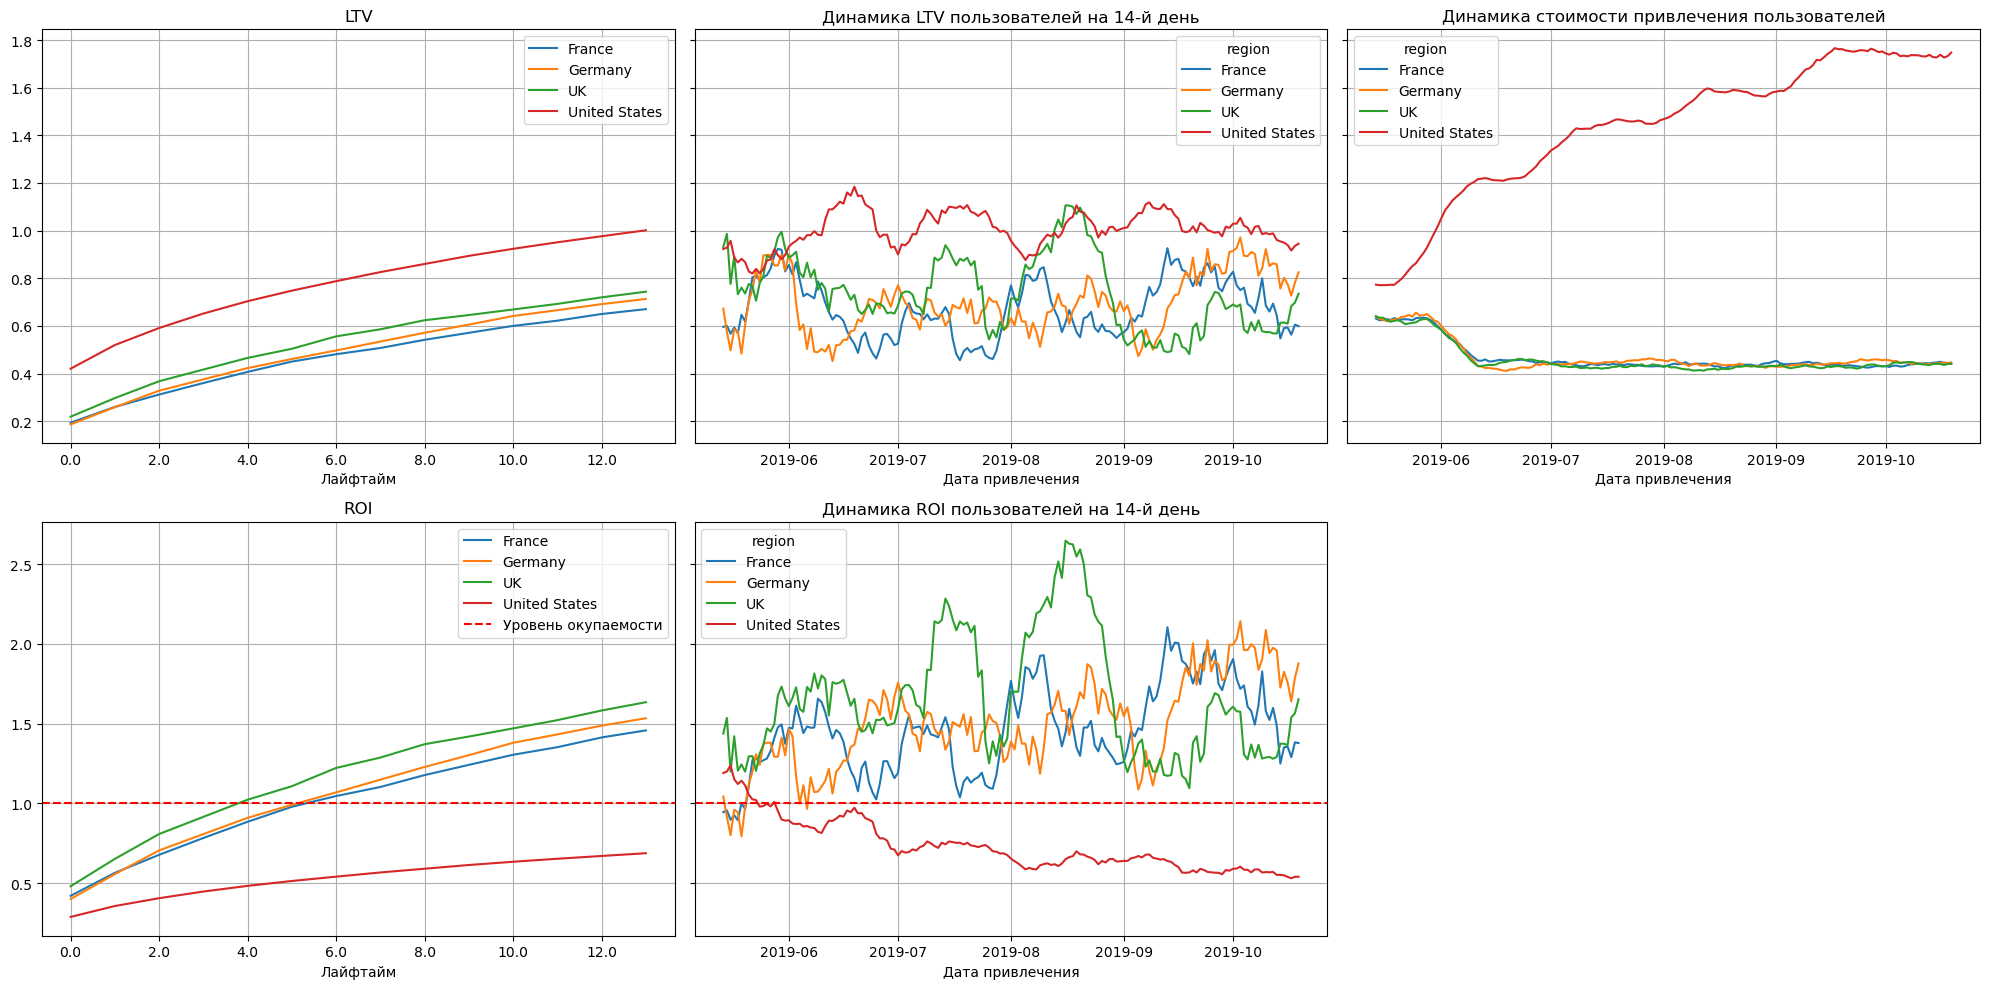

In [29]:
# Устанавливаем размерность для анализа по регионам
dimensions = ['region']

# Получаем данные по LTV (Lifetime Value) в сыром виде, сгруппированные данные и исторические данные по LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# Строим графики для LTV и ROI, а также их динамики с окном в 14 дней
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)  

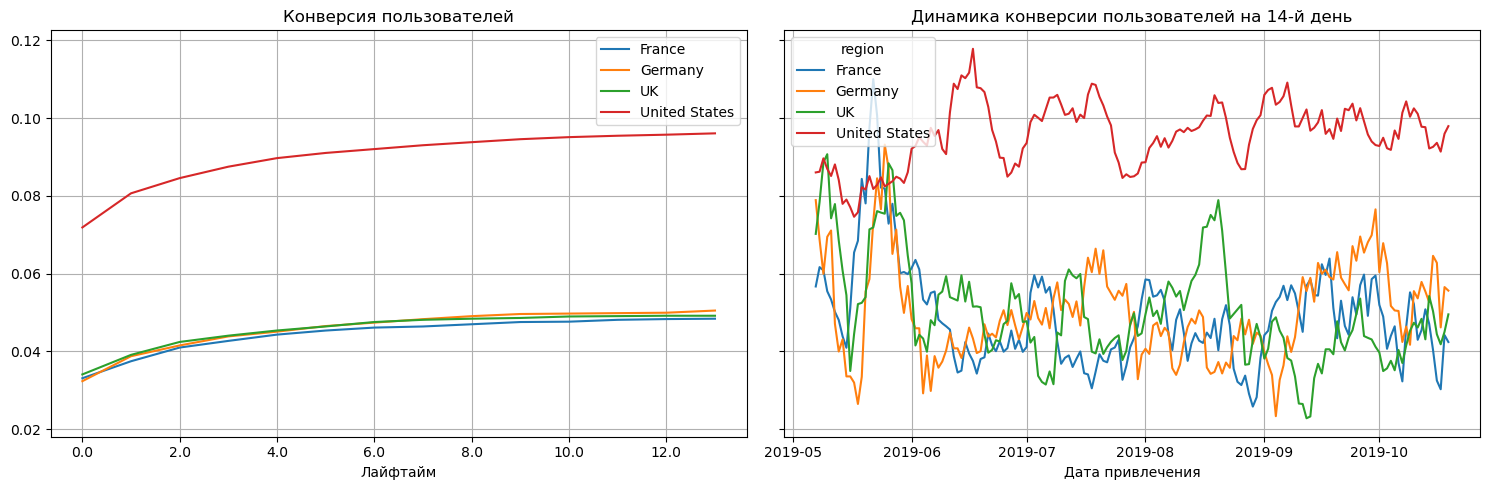

In [30]:
# Устанавливаем размерность для анализа по регионам
dimensions = ['region']

# Получаем данные по конверсии в сыром виде, сгруппированные данные и исторические данные по конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# Строим графики для конверсии и ее динамики
plot_conversion(conversion_grouped, conversion_history, horizon_days)  

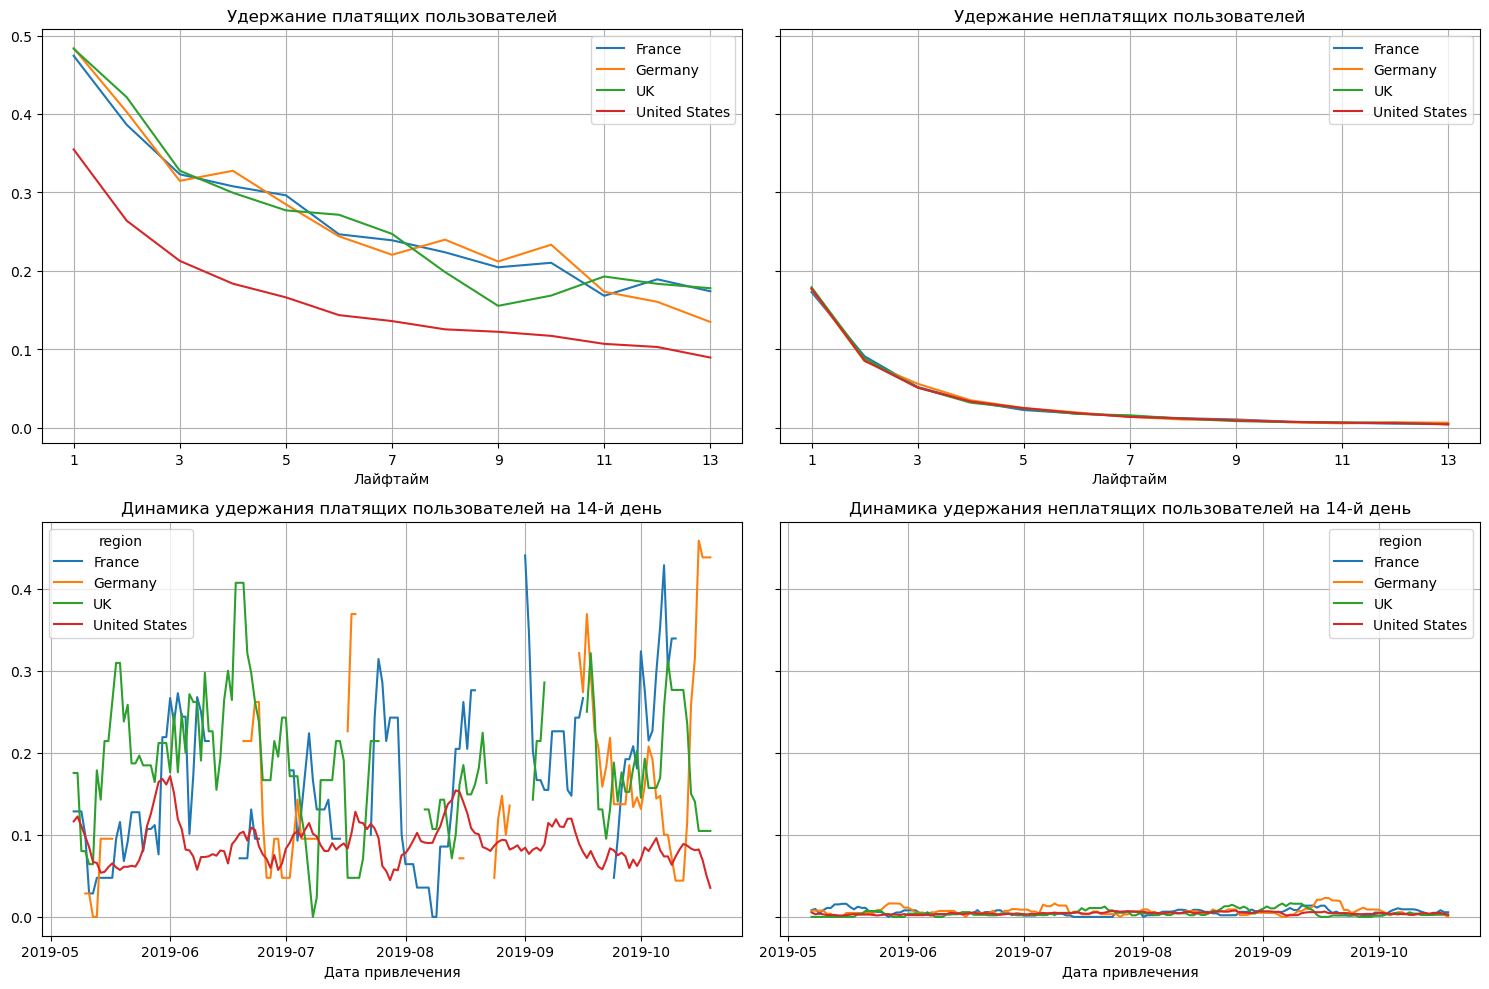

In [31]:
# Получаем данные по удержанию пользователей в сыром виде, сгруппированные данные и исторические данные по удержанию
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

# Строим графики для удержания пользователей и его динамики
plot_retention(retention_grouped, retention_history, horizon_days)  

In [32]:
# Анализируем количество уникальных пользователей по каналам и регионам для пользователей из США
profiles.query('region=="United States"').pivot_table(index='channel', columns='region', values='user_id', aggfunc='nunique') 

region,United States
channel,
FaceBoom,29144
MediaTornado,4364
RocketSuperAds,4448
TipTop,19561
YRabbit,4312


**Вывод** Общая картина разбивки по странам довольно не плохо. 
- Реклама окупается везде, кроме США. Наблюдается приличный разрыв.
- Несмотря на то, что LTV в США больше всех, то и САС в США тоже больше всех в несколько раз. Разрыв огромны
- Таким образом именно расходы региона США на привелчение клиентом ухудшает общую картину 
- Конверсия США самая лучшая, но при этом и удержание платящихся самое худшее. Несмотря на то, что в США привлечение клиентов больше всего, отток этих же клиентов больше всего.
- Из прошлых шагах мы помним, что основную часть финансов на рекламу забирал источник TipTop (около 52%) у которого общее количество пользователей было 19561 ед. и оно привелекло 1878 ед пользователей. Так получается все пользователи источника TipTop были привелечены из США, отсюда и большой расход и плохая окупаемость.

**5.5** Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Ответьте на такие вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?

In [ ]:
# Устанавливаем размерность для анализа по рекламным каналам
dimensions = ['channel']

# Получаем данные по LTV (Lifetime Value) в сыром виде, сгруппированные данные и исторические данные по LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# Строим графики для LTV и ROI, а также их динамики с окном в 14 дней
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)  

In [ ]:
# Устанавливаем размерность для анализа по рекламным каналам
dimensions = ['channel']

# Получаем данные по конверсии в сыром виде, сгруппированные данные и исторические данные по конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# Строим графики для конверсии и ее динамики
plot_conversion(conversion_grouped, conversion_history, horizon_days)  

In [ ]:
# Получаем данные по удержанию пользователей в сыром виде, сгруппированные данные и исторические данные по удержанию
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

# Строим графики для удержания пользователей и его динамики
plot_retention(retention_grouped, retention_history, horizon_days)  

**Вывод** Общая картина разбивки по странам довольно не плохо. 
- Реклама окупается везде, кроме tiptop, faceboom и adnonsense.  
- САС больше всех у tiptop. Так как это дорогой источник. Но, не смотря на это у faceboom и adnonsense расходы тоже не окупились. 
- Если в целом у tiptop причина неокупаемости понятно, то в faceboom и adnonsense несовсем ясно. Конверсии у faceboom и adnonsense самые лучшие, однако удержания платящихся пользователей и динамика удержание платящихся пользователей худшая среди всех.

**Самостоятельная работа** 

будем рассматривать каждый источник по отдельности. Условия таковы, что 1 клиент покупает 1 раз и стоимость 5.37 у.е.. При настоящих реалиях нам нужно рассматривать 100 000 человек кому было направлено или зашел на рекламу через определенный источник. 

In [ ]:
df_merged = pd.merge(channel_stats, total_costs_channe[['channel', 'costs']], on='channel', how='left')
df_merged = pd.merge(df_merged, cac_data[['channel', 'cac_cost']], on='channel', how='left')

df_result = df_merged[['channel', 'channel_share', 'cac_cost']]

# Переименовываем столбцы для более удобного отображения
df_result.columns = ['channel', 'channel_share', 'acquisition_cost']

# Переупорядочим и отформатируем данные (по необходимости)
df_result = df_result.sort_values(by='channel_share', ascending=False).reset_index(drop=True)

# Для вывода округлим значения до нужной точности
df_result['channel_share'] = df_result['channel_share'].round(6)
df_result['acquisition_cost'] = df_result['acquisition_cost'].round(3)
df_result['ad_cost']=df_result['acquisition_cost']*100000
df_result['customers_100']=df_result['channel_share']*100000/100
df_result['total_revenue']=df_result['customers_100']*5.37
df_result['revenue']=df_result['total_revenue']-df_result['ad_cost']
df_result['~~~']=df_result['channel_share']/df_result['acquisition_cost']

# Печатаем итоговый результат
display(df_result)

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Приложение Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

**1.** Источники привлечения пользователей 10(organic будет включать в список, так как они сами заходят без рекламы): 
1. TipTop		
2. FaceBoom	
3. AdNonSense	
4. lambdaMediaAds	
5. WahooNetBanner	
6. RocketSuperAds	
7. OppleCreativeMedia	
8. YRabbit	
9. MediaTornado	
10. LeapBob	
**2.** Устройства пользователей: 
1. Mac
2. Android 
3. Iphone 
4. PC
**3.** Привлечение пользователей из различных рекламных каналов
- TipTop -	54751.30 у.е.
- FaceBoom -	32445.60 у.е.
- WahooNetBanner -	5151.00 у.е.
- AdNonSense -	3911.25 у.е.
- OppleCreativeMedia - 	2151.25 у.е.
- RocketSuperAds -  	1833.00 у.е.
- LeapBob -  	1797.60 у.е.
- lambdaMediaAds - 	1557.60 у.е.
- MediaTornado - 	954.48 у.е.
- YRabbit - 	944.22 у.е.
- Общая сумма расходов на маркетинг: 105497.3 у.е.

**4.** Сколько денег приносит каждый клиент? в среднем расчете, при суммировании всех доходов и разделение на всех пользователей, получается 5,37 у.е.

**5.** Когда расходы на привлечение клиента окупаются? 
При текущих затратах для привлечения пользователей:
- По устройствам: Андроид и ПК
- По регионам: Франции, Германии и Объединенном королевтстве
- По каналам: WahooNetBanner, OppleCreativeMedia, RocketSuperAds, LeapBob, lambdaMediaAds, MediaTornado, YRabbit 

Расходы на привлечение/клиента пользователей по упомянутым устройствам, регионам и каналам окупаются.

**6.** Какие факторы мешают привлечению клиентов. 

Ситуация такова, что общий ROI доходит до 80%, т.е. реклама не окупается. Вот причины почему.
При текущих затратах для привлечения пользователей:
1. По устройствам:
- Из всех устройств только у ПК окупается
- По графикам можно сказать, что расходы на привлечения пользователя самые низкие у ПК, у остальных выше. Но в целом картина не меняется, так как ПК окупилась под конец лайфтайма(на 12 день) и окупилась только за счет самой низкой цены привлечения пользователей. 
2. По регионам:
- Проблемной зонов оказался США. В США единственная зона где не окупилась затраты на привлечение пользователей, где САС самый высокий среди других, с большим разрывом. И необходимо отметить, что удержание в США самое низкое среди всех.
3. По каналам: 
- TipTop является самым дорогим источником среди всех, доля котороо составляет 52% от общего бюджета и на 1-го привлеченного пользователя приходиться 2,8 у.е., даже несмотря на то, что привлечение источником является самым высоким (около 12%). Несмотря на все это, удержание пользователей источником TipTop одно из самых низких, даже несмотря на то, что конверсия одно из лучших. Поэтому оно является убыточным.
- FaceBoom LTV довольно таки неплохой, САС стабильный, конверсия лучшая, но удержание пользователей одна из самых низких 


Расходы на привлечение/клиента пользователей по упомянутым устройствам, регионам и каналам не окупаются. Причем очень сильно. Необходимо пересмотреть расходы на привлечение пользователей по вышеупомянытым устройствам, регионам и каналам.

**Предложение маркетологам** 

В тестовом режиме, необходимо рассмотреть применение таких источников как RocketSuperAds, YRabbit, MediaTornado, lambdaMediaAds и LeapBob на территории Франции, Германии и ОК по устройствам ПК и Андроид. По результатам, провести А/Б тест на территории США